<a href="https://colab.research.google.com/github/yuzukaR/ML_Final/blob/main/Data%20Cleaning%26clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the data
housing = pd.read_csv('housing.csv')

# Step 3: Drop rows with null values
housing = housing.dropna()

housing.columns
housing.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [36]:
ocean_proximity_mapping = {
    '<1H OCEAN': 3,
    'NEAR OCEAN': 2,
    'NEAR BAY': 1,
    'INLAND': 0
}
housing['ocean_proximity'] = housing['ocean_proximity'].map(ocean_proximity_mapping)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale features (especially when features vary greatly in magnitude)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = rf_model.score(X_test_scaled, y_test)
print(f'R-squared: {r2}')

# Get and display feature importances
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

Mean Squared Error: 2380962950.925195
R-squared: 0.8258916654795354

Feature Importances:
              Feature  Importance
7       median_income    0.485084
8     ocean_proximity    0.151073
0           longitude    0.109909
1            latitude    0.105633
2  housing_median_age    0.050485
5          population    0.032939
3         total_rooms    0.024130
4      total_bedrooms    0.022099
6          households    0.018648


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       5
dtype: int64


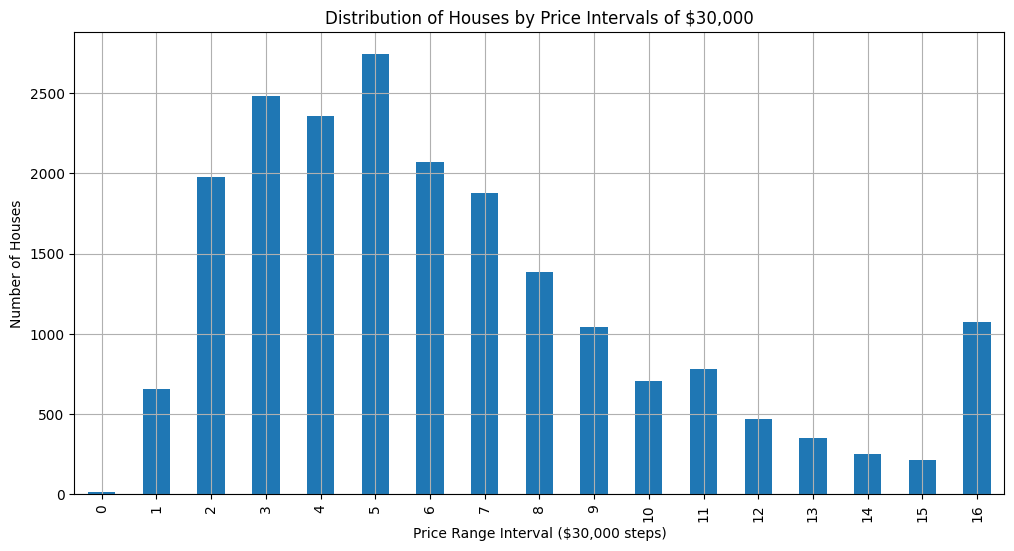

Updated CSV file saved to: housing_updated.csv


In [38]:

max_value = housing['median_house_value'].max()
bins = np.arange(0, max_value + 30000, 30000)

# Assign price range based on these bins
housing['price_range'] = pd.cut(housing['median_house_value'], bins=bins, labels=False, right=False)

housing = housing.drop(columns=['median_house_value'])

# Step 6: Save the updated data to a new CSV
output_path = 'housing_updated.csv'
housing.to_csv(output_path, index=False)


# Step 1: Features (remove target)
X = housing.drop(columns=['price_range'])

# Check missing values
print(X.isnull().sum())

# Drop rows with missing values if any
X = X.dropna()

# Step 7: Visualization: Distribution of price ranges
plt.figure(figsize=(12,6))
housing['price_range'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Price Range Interval ($30,000 steps)')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Price Intervals of $30,000')
plt.grid(True)
plt.show()

# Output file path
print(f"Updated CSV file saved to: {output_path}")


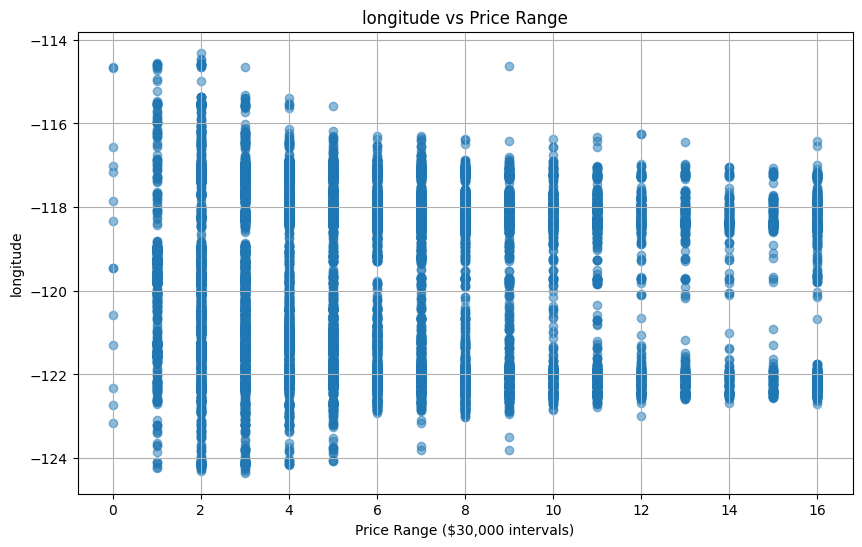

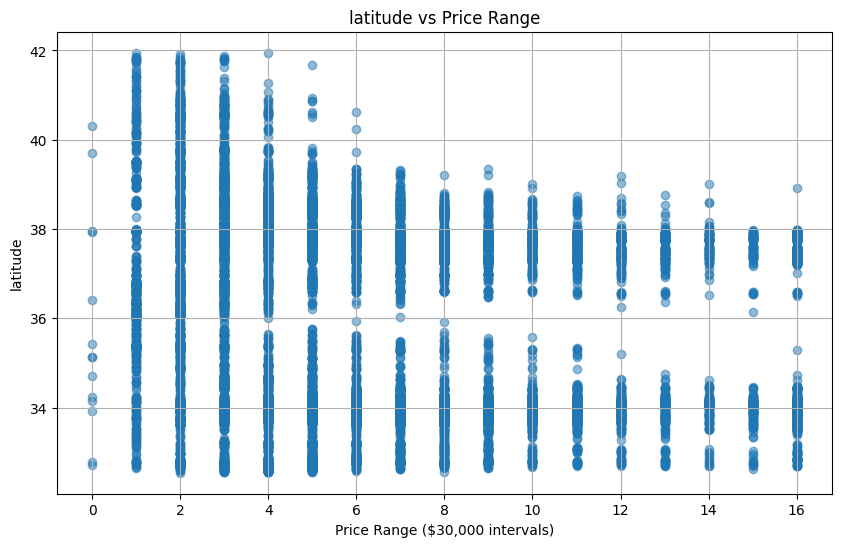

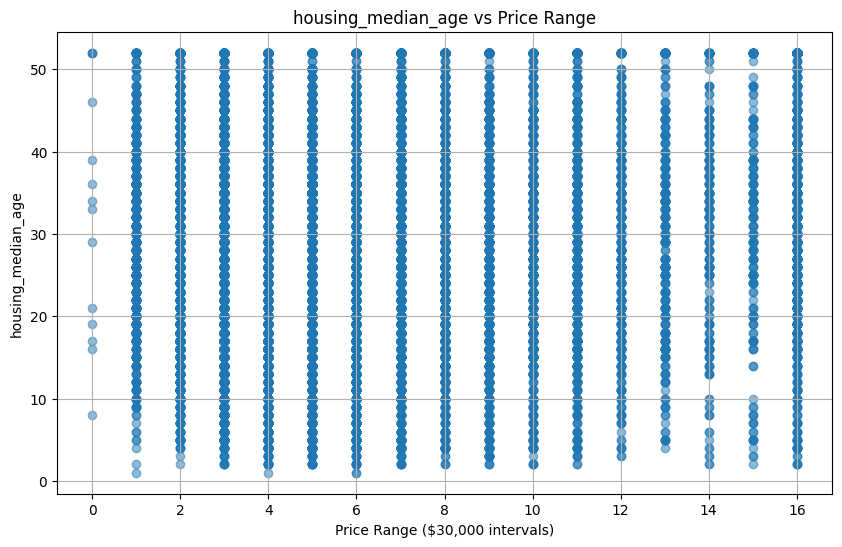

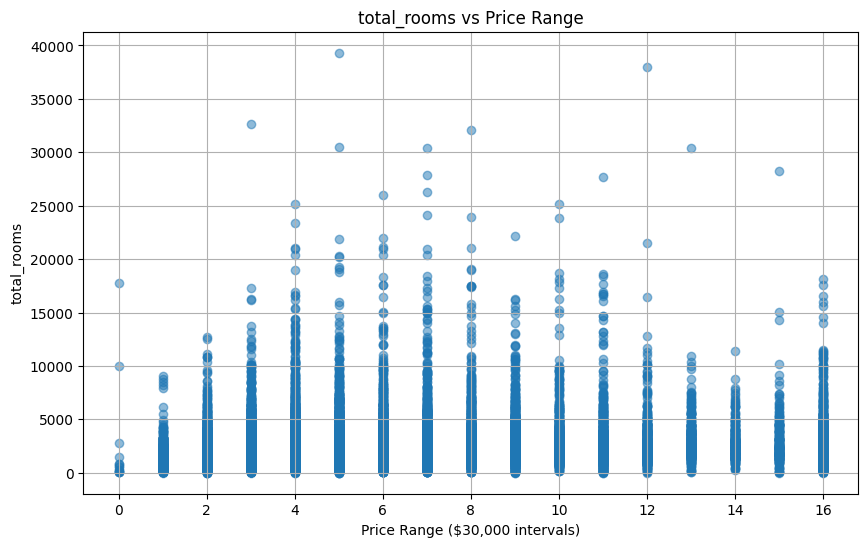

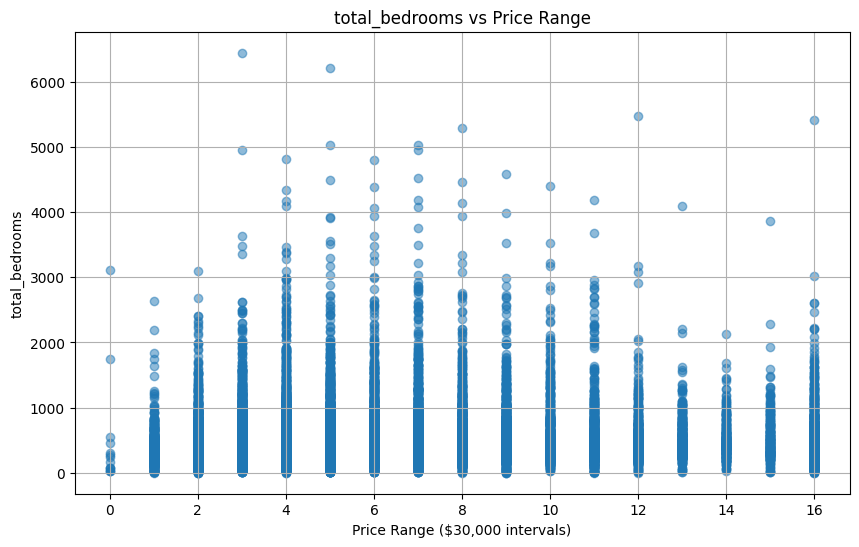

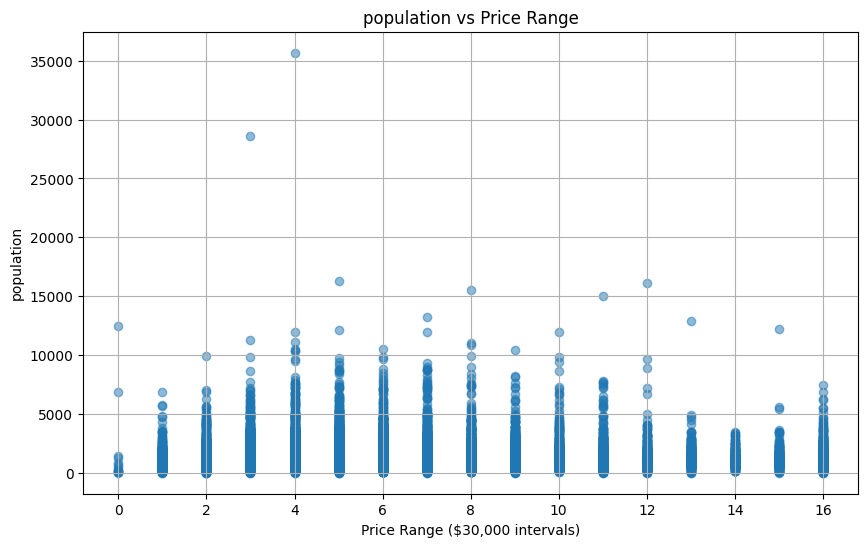

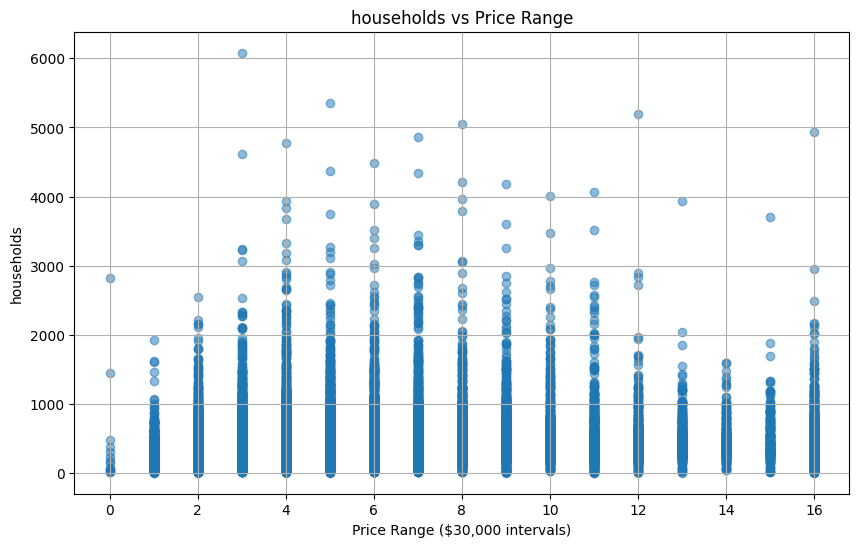

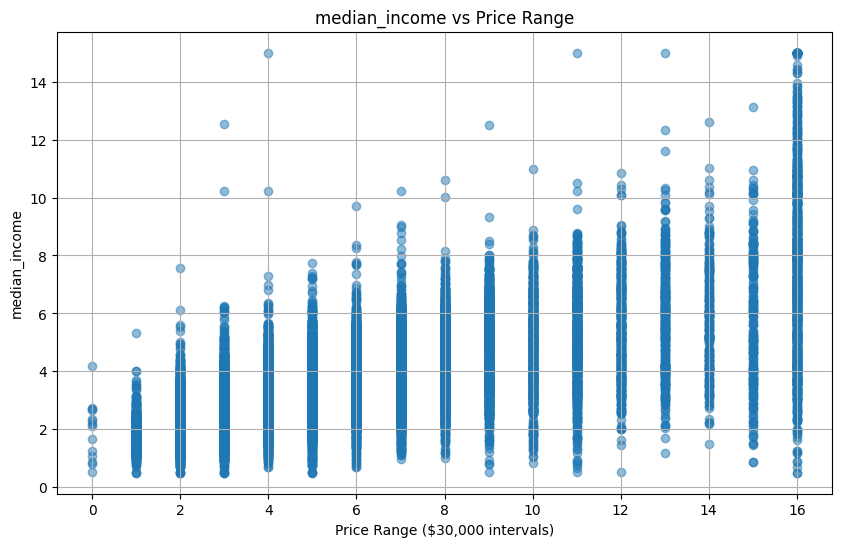

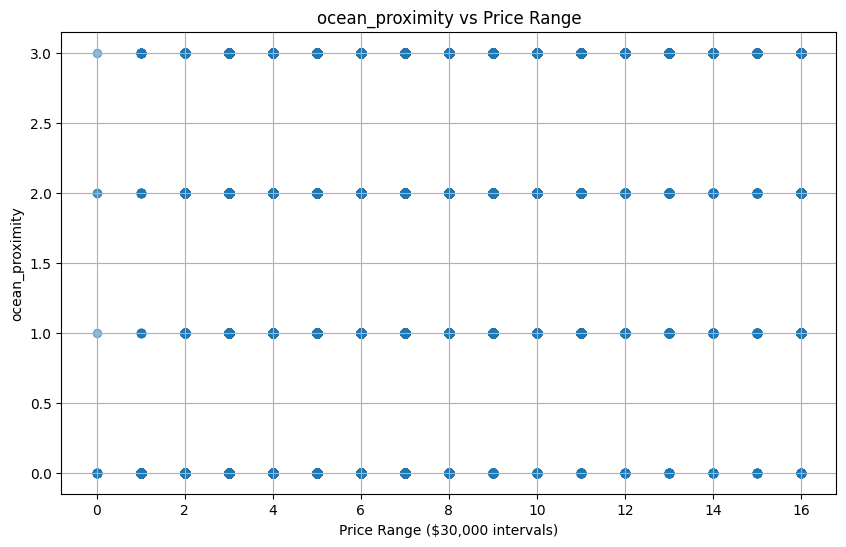

In [39]:
features = housing.columns.drop('price_range')  # all features except target

# Plot
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(housing['price_range'], housing[feature], alpha=0.5)
    plt.xlabel('Price Range ($30,000 intervals)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Price Range')
    plt.grid(True)
    plt.show()

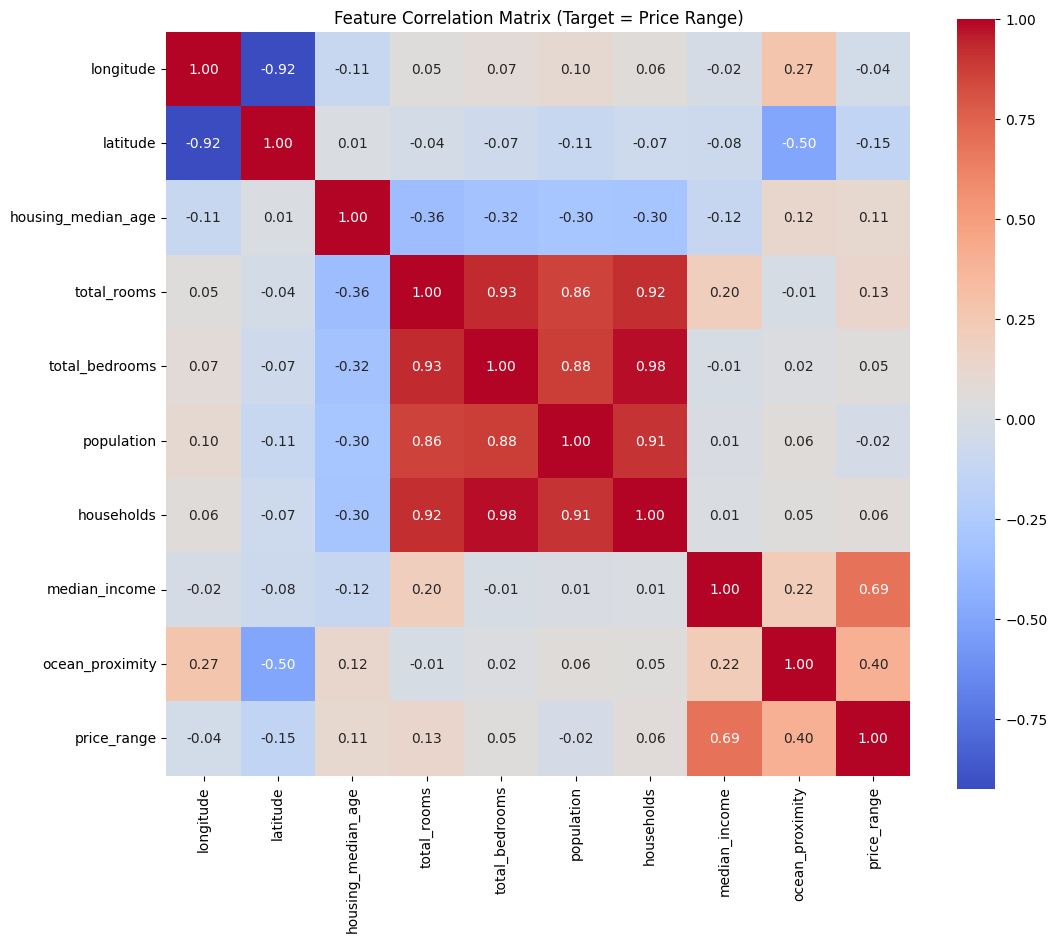

Highly Correlated Columns:
latitude and longitude with correlation: -0.9246161131160101
total_bedrooms and total_rooms with correlation: 0.9303795046865031
households and total_rooms with correlation: 0.9189915343453182
households and total_bedrooms with correlation: 0.9797282708045709
households and population with correlation: 0.9071859001744995


In [40]:
# Step 1: Calculate correlation matrix
corr_matrix = housing.corr()

# Step 2: Display the correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix (Target = Price Range)')
plt.show()

# Identify and print highly correlated feature pairs (e.g., correlation > 0.9 or < -0.9)
threshold = 0.9
high_corr_pairs = []  # To store pairs of highly correlated columns

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname_1 = corr_matrix.columns[i]
            colname_2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname_1, colname_2, corr_matrix.iloc[i, j]))

# Print the high correlation pairs
print("Highly Correlated Columns:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation: {pair[2]}")

In [41]:
housing = housing.dropna()
# Separate features (X) and target (Y)
X = housing.drop(columns=['price_range'])  # Features only
Y = housing[['price_range']]               # Target only (keep it as DataFrame)

# Save to CSV files
X.to_csv('X.csv', index=False)
Y.to_csv('Y.csv', index=False)

print("Files saved: X.csv (features) and Y.csv (target)")

Files saved: X.csv (features) and Y.csv (target)


Explained variance ratio for each principal component:
Component 1: 0.4345 (43.45% of total variance)
Component 2: 0.2416 (24.16% of total variance)
Component 3: 0.1238 (12.38% of total variance)
Component 4: 0.1078 (10.78% of total variance)
Component 5: 0.0633 (6.33% of total variance)
Component 6: 0.0162 (1.62% of total variance)
Component 7: 0.0069 (0.69% of total variance)
Component 8: 0.0042 (0.42% of total variance)
Component 9: 0.0016 (0.16% of total variance)


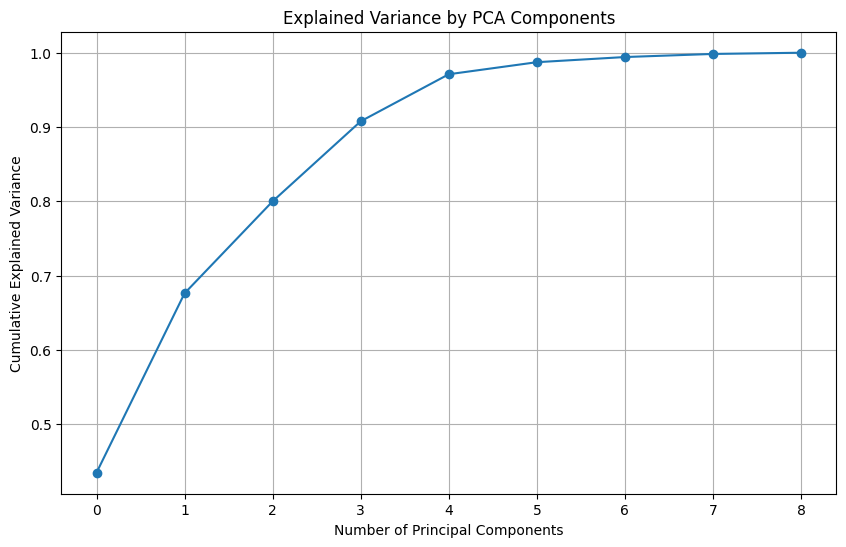

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Load the features from X.csv
X = pd.read_csv('X.csv')

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Print explained variance for each component
print("Explained variance ratio for each principal component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {var:.4f} ({var*100:.2f}% of total variance)")

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [43]:
X_pca_5 = X_pca[:, :5]
print("Shape of reduced X_pca_5:", X_pca_5.shape)
cumulative_variance_5 = np.sum(pca.explained_variance_ratio_[:5])
print(f"Cumulative explained variance of first 5 principal components: {cumulative_variance_5:.4f} ({cumulative_variance_5*100:.2f}%)")

Shape of reduced X_pca_5: (20428, 5)
Cumulative explained variance of first 5 principal components: 0.9710 (97.10%)


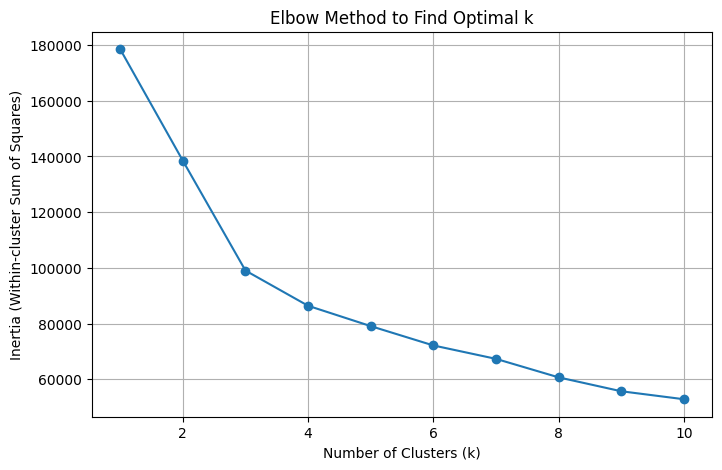

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Test different cluster numbers
inertia = []
cluster_range = range(1, 11)  # Trying 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_5)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.figure(figsize=(8,5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()

In [45]:
# Apply KMeans with chosen number of clusters (say 5)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca_5)

# Print how many samples in each cluster
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))

{np.int32(0): np.int64(9283), np.int32(1): np.int64(8017), np.int32(2): np.int64(2828), np.int32(3): np.int64(300)}


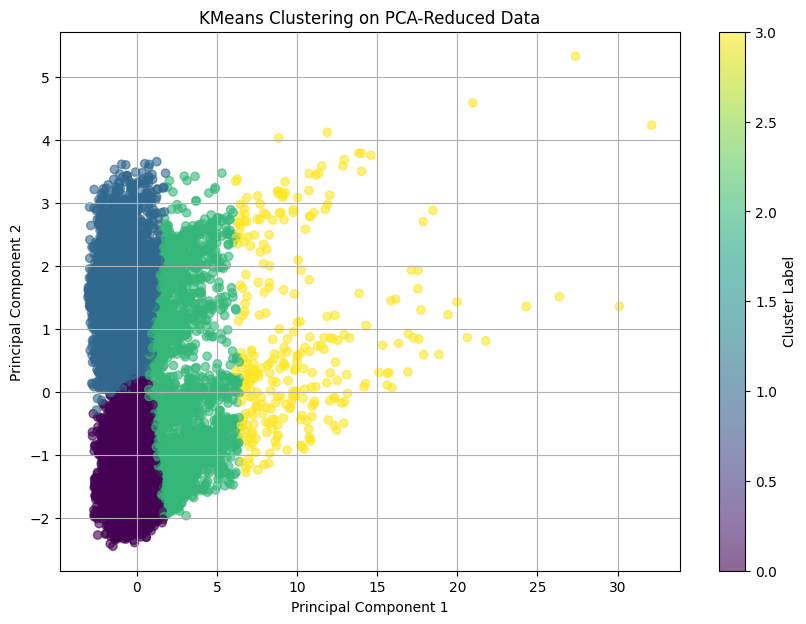

In [46]:
# Visualization
plt.figure(figsize=(10,7))
plt.scatter(X_pca_5[:, 0], X_pca_5[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

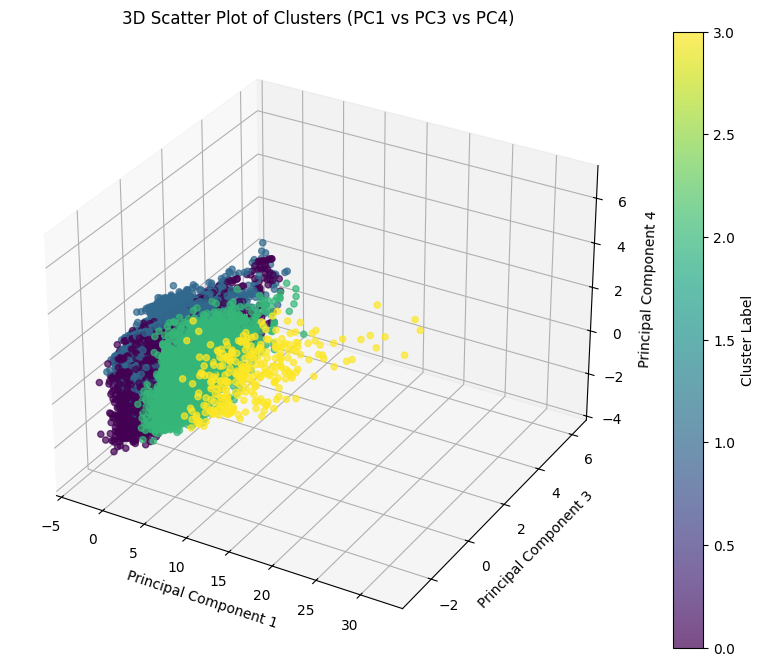

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using PC1 (X axis), PC3 (Y axis), PC4 (Z axis)
scatter = ax.scatter(
    X_pca_5[:, 0],  # PC1
    X_pca_5[:, 2],  # PC3
    X_pca_5[:, 3],  # PC4
    c=clusters,
    cmap='viridis',
    alpha=0.7
)

# Label the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 3')
ax.set_zlabel('Principal Component 4')

# Title and color bar
ax.set_title('3D Scatter Plot of Clusters (PC1 vs PC3 vs PC4)')
fig.colorbar(scatter, label='Cluster Label')

# Show plot
plt.show()